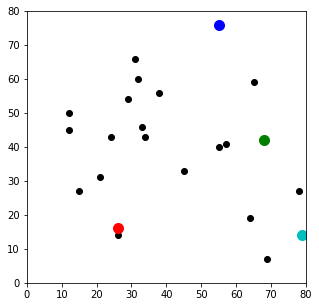

In [1]:
'''imeja dannye, vybiraem centroidy i smotrim, kak eto vyglyadit'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame({
    'x': [15, 12, 34, 21, 29, 33, 24, 65, 45, 32, 31, 12, 55, 38, 26, 57, 64, 69, 78],
    'y': [27, 45, 43, 31, 54, 46, 43, 59, 33, 60, 66, 50, 40, 56, 14, 41, 19, 7, 27]
})


np.random.seed(200)
k = 4
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}
    
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b', 4:'c'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], s=100)
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

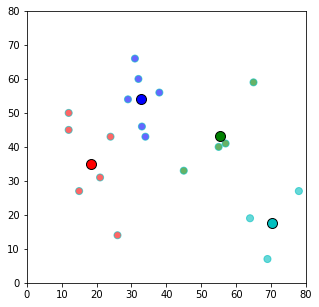

In [5]:
'''schitaem rasstoyanie ot kajdoi tochki do centroidy i dvigaem centroidu k svoemu klasteru'''
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)


fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.6, edgecolor='c', s=50)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], s=100, edgecolor='k')
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

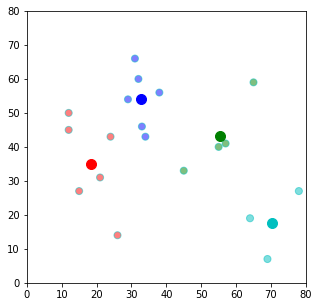

In [4]:
'''povtoriaem, poka grafic ne perestanet meniatsia'''
while True:
    def update(k):
        for i in centroids.keys():
            centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
            centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
        return k
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='c', s=50)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i],  s=100)
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()